# <font color = "#F3A505" > LAD/OLS regression using L1 and L2 regularization
 
    
<hr>

In this exercise, we are trying to apply the L1 and L2 regularization methods to previously constructed OLS regression and compare their results with simple OLS or LAD regression. 

We are going to define new objective functions for our optimization problems, hence the LAD and OLS variants of linear/polynomial regression are developed. We are also going to define new costs for these objective function, hence the L1 and L2 regularization are prefromed on our optimization problems.
    
    
Our **goal** for this excerice is to compare these methods on various datasets. 
    
In other words : for each dataset we create multiple models using simple (LAD or OLS) regression or regularized (L1 or L2) regression; Then we compare these results to find the best model that can fit our data. Datasets are also diffent; All of them contain noise whereas one of them has two outliers and another one has more samples.
    
<hr> 
    
Everything required for this exercise is available at : 
   
 
    
   
***GitHub***  : <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU.git" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU/tree/main/Questions/Q-Series4" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "" >  </a>

# <font color = "#F3A505" > Import libraries
    
<hr>
 
    
It is essential that we first load these libraries in our code so that it can work.
    
-  numpy, pandas, matplotlib are all necessary libraries to perform simple tasks on our data such as reading, creating dataframes, visualizing, mathematical operations, etc.
   
    
    
-  sklearn LinearRegression is used to create OLS regression (linear regression of common knowledge).

    
    
-  sklearn PolynomialFeatures is used to create OLS polynomial regression (linear regression on polynomial features).
    
    
    
-  sklearn Lasso and LassoCV are both used to apply L1 regularization on OLS polynomial/linear regression. Lasso is using a pre-defined $\alpha$  or $\lambda$ to apply the regularization whereas LassoCV uses cross-validation to find the best $\alpha$ and then apply it to the regression. LassoCV is later explained in this document.
    
    
    
-  sklearn Ridge and RidgeCV are both used to apply L2 regularization on OLS polynomial/linear regression. Ridge is using a pre-defined $\alpha$ or $\lambda$ to apply the regularization (similar to Lasso) whereas RidgeCV uses cross-validation to find the best $\alpha$ among the given array of $\alpha$s. RidgeCV is later explained in this document.
    
    
    
-  sklego LADRegression is used to create LAD regression (Least Absolute Deviation/Error)
    
    
    
If you don't have any/some of these installed, please <code> pip install </code> them


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# <font color = "#F3A505" > Import data
    
<hr>
    
Data primary path is in a directory called  "**Data** " which is located in the main directory. In Data directory there is another directory calld Q1S4 which contains the data that we'll be using for this part of our exercise.
We use pandas to read these csv files, dataset2 to dataset5 which are train data whereas dataset3 is 
the test data that will be used to evaluate our models constructed by each dataset.

    
    

If for any reason the data is not available in the *Data* directory, Use the links above to download the data and place them at the appropriate location. Just choose the proper *path* according to the location you use to place your datasets so the other lines of the code can function properly.

   
$\bullet$ Actual/ Real function is $ y = \sin(2\pi x)$
    
$\bullet$ dataset2 consists of 10 random numbers of function $ y = \sin(2\pi x)$ between [0,1]  with a little bit of noise
    
$\bullet$ dataset3 as mentioned before is our test data with 50 samples
    
$\bullet$ dataset4 is similar to dataset2 but with two outliers
    
$\bullet$ dataset5 is similar to dataset2 but with more samples
    
We save all of these datasets in a list called *datasets*.

In [2]:
path = '../Data/Q1S4/'

dataset2 = pd.read_csv(path+'data2.csv')
dataset3 = pd.read_csv(path+'data3.csv')
dataset4 = pd.read_csv(path+'data4.csv')
dataset5 = pd.read_csv(path+'data5.csv')

datasets = {2:dataset2, 3:dataset3, 4:dataset4, 5:dataset5}

## <font color = "#F3A505" > Sort data
    
We have already said that it is important that we sort the data based on the variable we wish to use to visualize. For further information use the links above to the main repo and check Q-Series2. 

In [3]:
for index in range(2,6):
    datasets[index] = datasets[index].sort_values(by = 'x')

# <font color = "#F3A505" > Data Visualization
    
    
<hr>
    
    
Visualizing every dataset given to us.

    

First we draw the actual/real/exact function which is $\sin(2\pi x)$. To draw this function, we create an array of numbers in the range [0,1]; Hence we use *np.arange(start, stop, step)*. Then we calculate y based on $\sin(2\pi x)$ using *np.sin()*.

    

Each dataset contains samples from this function. X value is given to us ,then by some means they calculated the y (or t) value which is **supposed to be** $\sin(2\pi x)$. Since we can have error in our calculation, it is not guaranteed that our result will be on the actual function. Our object is to estimate this actual function ($\sin(2\pi x)$) using data which can contain noise, outliers, etc .

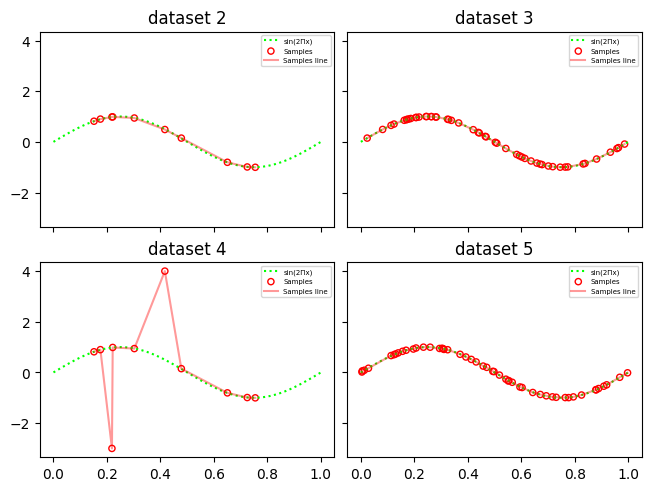

In [4]:
x = np.arange(0,1+0.01,0.01)
y = np.sin(2*np.pi*x)

fig = plt.figure(constrained_layout=True)
axd = fig.subplot_mosaic(
    """
    AAAABBBB
    AAAABBBB
    CCCCDDDD
    CCCCDDDD
    """
    ,
    sharex = True,
    sharey = True
)

for dic,index in zip(['A', 'B', 'C', 'D'], range(2,6)):
    
    axd[dic].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Œ†x)')
    x_dataset = datasets[index]['x'].values
    y_dataset = datasets[index]['t'].values
    axd[dic].scatter(x_dataset,y_dataset,s=20, facecolors='none', edgecolors='red', label = 'Samples')
    axd[dic].plot(x_dataset,y_dataset, color = 'red', linestyle = '-', label = 'Samples line' ,alpha = 0.4)
    axd[dic].set_title('dataset ' + str(index))
    axd[dic].legend(loc = 'upper right', prop = {'size': 5})

# <font color = "#F3A505" > Polynomial features

<hr>
    

In previous exercises, we proved that we can apply linear regression on polynomial features. That is to define a base function $\Phi$ that can be used in our regression. 
    
Normally a linear regression for $x \in \mathbb{R}$ and $y \in \mathbb{R}$ is $y \approx \hat y_i = W_0 + W_1 x_i $. We said that we can use $\Phi$ to simplify our equation. Therefore $\hat y_i = W^T\Phi(x_i)$ where $\Phi^T(x_i) = [1 , x_i]$ and 
$W^T = [W_0 , W_1]$. 
    
In case of Polynomial Features, we assume we have multiple features, therefore we can use linear regression on multiple features. For example, if $x \in \mathbb{R}$ and $y \in \mathbb{R}$ then $y \approx \hat y_i = W_0 + W_1 x_i + W_2X_i^2  + \dots$ where $\Phi^T(x_i) = [1 , x_i, x_i^2 , \dots ]$ and  $W^T = [W_0 , W_1 , W_2 , \dots]$.
    
Assuming we have $N$ samples, $X^T = [x_1 , x_2 , \dots, x_i , x_{i+1}, \dots , x_N]$ and $Y^T = [y_1 , y_2 , \dots, y_i , y_{i+1}, \dots , y_N]$, the estimated function/model on degree $M$ is $\hat Y = \Phi W$ where $W^T = [W_0 , W_1 , \dots, W_M]$ and $\Phi^T = [\Phi(x_1), \Phi(x_2), \dots, \Phi(x_N)]$.
    
In other words : 
    
$$
  Y \approx \hat  Y = \Phi W \hspace{10mm}
  \Phi = \begin{bmatrix} 1,x_1, x_1^2, x_1^3, \dots , x_1^M\\1,x_2, x_2^2, x_2^3, \dots , x_1^M\\ \vdots \\1,x_i, x_i^2, x_i^3,   \dots , x_i^M\\ \vdots \\1,x_N, x_N^2, x_N^3, \dots , x_N^M \end{bmatrix}_{N \times (M+1)}
  W = \begin{bmatrix} W_0\\W_1\\ \vdots \\W_i\\ \vdots \\W_M \end{bmatrix}_{(M+1)\times 1}
  \hat Y = \begin{bmatrix} \hat t_1\\\hat t_2\\ \vdots \\\hat t_i\\ \vdots \\\hat t_N \end{bmatrix}_{N \times 1}
  Y = \begin{bmatrix} t_1\\t_2\\ \vdots \\t_i\\ \vdots \\t_N \end{bmatrix}_{N \times 1} 
$$
    
    
To create these polynomial features first we need to create a polynomial. In this exercise we are going to use only two different degrees, degree 8 and degree 9. 

In [5]:
degree = [8,9]
polynomials = {}
for M in degree:
    polynomials[M] = PolynomialFeatures(degree = M, include_bias = True)

## <font color = "#F3A505" > $\Phi$
    
    
Using the polynomials that we constructed, we are going to create $\Phi$.
    
$$\Phi = \begin{bmatrix} 1,x_1, x_1^2, x_1^3, \dots , x_1^M\\1,x_2, x_2^2, x_2^3, \dots , x_1^M\\ \vdots \\1,x_i, x_i^2, x_i^3,   \dots , x_i^M\\ \vdots \\1,x_N, x_N^2, x_N^3, \dots , x_N^M \end{bmatrix}_{N \times (M+1)}$$
    
$\bullet$ dataset 2 is polynomial with degree *9* 
    
$\bullet$ dataset 4 is polynomial with degree *8* 
    
$\bullet$ dataset 5 is polynomial with degree *9* 
    
Using the instruction above, we create $\Phi$ and $Y$ for each dataset. That is for example if I say <code>Phi['dataset2']['degree9']</code> it is the $\Phi$ that is constructed using dataset 2 on a polynomial degree 2, and <code>Y['dataset2']</code> is the t column of dataset2. 
    
Since dataset3 is used for test on all cases, we require to create $\Phi$ for both polynomial degree 8 (to test dataset 4 model)  and degree 9 (to test datasets 2 and 5).

In [392]:
Phi = {}
Y   = {}

for index in range(2,6):
    phidegree = {}
    for M in [8,9]:
        if (index == 2 and M == 8) or (
            index == 5 and M == 8) or (
            index == 4 and M == 9) :
            continue
            
        x = datasets[index]['x'].values.reshape(-1,1)
        t = datasets[index]['t'].values
        x = polynomials[9].fit_transform(x)
        phidegree['degree'+str(M)] = x
        
        
    
    Phi['dataset' + str(index)] = phidegree
    Y['dataset' + str(index)]   = t
        
        

# <font color = "#F3A505" > Least Absolute Deviation Regression

<hr>
    

Least absolute deviations (LAD) , also known as Least absolute error (LAE) is a type of regression where the loss function in on absolute error.
    
Recall linear/polynomial regression, $Y \approx \hat Y = \Phi W $. The best model (according to our train data) is the model that can is very close to $Y$, that is the difference between $Y$ and $\hat Y$ is small. To define closeness or difference we use norms (since it is a vector of $y_i$s or $\hat y_i$s).'Therefore, the objective function is to find the best $W$ that can minimize this difference.
    
In other words, we need to define a loss function that is calculated for each ($y_i$, $\hat y_i$), and then minimize the sumation of these loss values. 
    
    
This means :
    
$\min \sum_{i=1}^{N}loss(y_i,\hat y_i) \\\Longrightarrow\min_W \sum_{i=1}^{N}loss(y_i,\Phi^T(x_i) W) \\\Longrightarrow \min_W Loss(Y, \hat Y) \\\Longrightarrow \min_W Loss(Y, \Phi W)$
    
    
In LAD or LAE we define this $Loss$ as L1 norm ,therefore we have :
    
$
\min_W Loss(Y, \Phi W) \Longrightarrow L1 norm \Longrightarrow \min_W ||Y - \Phi W  ||_1 = \min_W \sum_{i=1}^{N} |y_i - \Phi^T(x_i)W | 
$
    
Since it is using absolute value, it is not as sensitive to outlier as L2 norm, because L2 norm works with squared values.
    
    
For LAE models we are using sklego LADRegression. The document page for this library can be found using this link :
<a href = "https://scikit-lego.netlify.app/linear-models.html#Least-Absolute-Deviation-Regression" > scikit-lego </a>
    
    
Because of the $\Phi$ we set the <code>fit_intercept= False</code> so that <code>model.coef_</code> is equivalent to $W$

In [7]:
LAD_models = {}

# Dataset 2 and M = 9

model = LADRegression(fit_intercept= False)
model.fit(Phi['dataset2']['degree9'], Y['dataset2'])

LAD_models['dataset2'] = model


# Dataset 4 and M = 8

model = LADRegression(fit_intercept= False)
model.fit(Phi['dataset4']['degree8'], Y['dataset4'])

LAD_models['dataset4'] = model


# Dataset 5 and M = 9

model = LADRegression(fit_intercept= False)
model.fit(Phi['dataset5']['degree9'], Y['dataset5'])

LAD_models['dataset5'] = model



# <font color = "#F3A505" > Ordinary Least Squares Regression

<hr>
    

Ordinary least squares Regression (OLS) is a type of regression where the loss function in on the squared error.
    
Recall the LAD/LAE section, our objective is in the form of $\min_W Loss(Y, \Phi W)$.
        
In OLS we define this $Loss$ as L2 norm ,therefore we have :
    
$
\min_W Loss(Y, \Phi W) \Longrightarrow L2 norm \Longrightarrow \min_W ||Y - \Phi W  ||_2^2 = \min_W \sum_{i=1}^{N} (y_i - \Phi^T(x_i)W )^2 
$
    
Since it is using squared values, it is very sensitive to outlier.
    
OLS models are the more common and they are the base of regression models in scikit learn, Therefore the LinearRegression method of scikit learn, uses L2 norm as its loss function. 
    
OLS is easy to solve since it can make use of matrix methods to find the optimum value.
    
Assume our optimization problem is $min_W ||\Phi W - Y ||_2^2$, the optimum for $W$ is $\Phi^\dagger Y$ where $\Phi^\dagger$is pseudo inverse of $\Phi$.
    
Because of the $\Phi$ we set the <code>fit_intercept= False</code> so that <code>model.coef_</code> is equivalent to $W$

In [8]:
OLS_models = {}

# Dataset 2 and M = 9

model = LinearRegression(fit_intercept= False)
model.fit(Phi['dataset2']['degree9'],Y['dataset2'])

OLS_models['dataset2'] = model


# Dataset 4 and M = 8

model = LinearRegression(fit_intercept= False)
model.fit(Phi['dataset4']['degree8'],Y['dataset4'])

OLS_models['dataset4'] = model


# Dataset 5 and M = 9

model = LinearRegression(fit_intercept= False)
model.fit(Phi['dataset5']['degree9'],Y['dataset5'])

OLS_models['dataset5'] = model




# <font color = "#F3A505" > LAD vs OLS

<hr>
 
    
The main difference between LAD and OLS is that LAD is less sensitive to outliers, even though OLS is solved more easily. 

To observe the difference between these two regressions we use a dummy example. Assume we are trying to estimate $ y  = 3x + 5$. The data that is given to use contain both noise and outliers.
    
    
It can be seen that LAD is less sensitive to outliers than OLS.

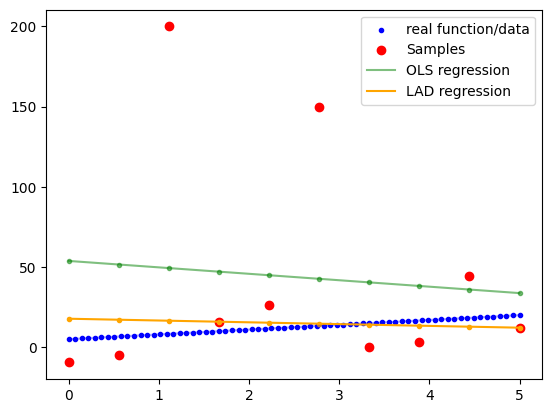

In [10]:
# Real function
x_real = np.linspace(0,5, num = 70)
y_real = 3*x_real + 5 

# Our data

x_data = np.linspace(0, 5, 10)
y_data = 3*x_data + 5 + 10*np.random.randn(10)
x_data = x_data.reshape(-1, 1)

y_data[2] = 200
y_data[5] = 150


# OLS

y_ols = LinearRegression().fit(x_data,y_data).predict(x_data)

# LAD

y_lad = LADRegression().fit(x_data,y_data).predict(x_data)



plt.plot(x_real,y_real, color = 'blue', alpha = 0.3)
plt.scatter(x_real,y_real, color = 'blue', marker = '.', label = 'real function/data')

plt.scatter(x_data, y_data, color = 'red', marker = 'o', label = 'Samples')

plt.plot(x_data, y_ols, color = 'green', label = 'OLS regression', alpha = 0.5)
plt.scatter(x_data, y_ols, color = 'green', marker = '.', alpha = 0.5)


plt.plot(x_data, y_lad, color = 'orange', label = 'LAD regression', alpha = 1)
plt.scatter(x_data, y_lad, color = 'orange', marker = '.', alpha = 1)


plt.legend(loc = 'best')
plt.show()


# <font color = "#F3A505" > Regularization

<hr>
    
Our studies suggests the higher the degree of polynomial regression (according to number and behaviour of samples) the bigger the $W$. This can cause model to overfit, which means our model focuses too much on the training datasets and cannot perfrom well enough on test datasets. To improve the robustness and efficiency of our models we need to find the parameters that can cause the model to overfit and control(regularize) it. In polynomial regression the only parameter used is $W$, Therefore we need to control (regularize) this $W$. 
    
Assuming we are using OLS as our base regression method, our pre-regularized  objective function is : $\min_W ||\Phi W - Y ||_2^2$; Which is a simple optimization problem and can be solved using $W = \Phi^\dagger Y$.
    
Knowing that bigger $W$ scales can cause the model to overfit we need to create a multi-objective optimization problem where not only minimizes the Loss function but also tries to minimize $W$. In other words , regularization problems are of this form :
    
$\min_W ||\Phi W - Y ||_2^2 + \alpha ||W||_{?}^{?}$
    
Where $\alpha$ (or $\lambda$ in some books) is the strongness of the regularization. if $\alpha$ is 0 then no regularization is performed (model will overfit) and if $\alpha$ is too high it can cause the optimization to focus too much on minimizing the $W$ which can cause it to perform poorly on both test and train datasets (model will underfit). Therefore, the value of $\alpha$ is important to obtain a proper regularized model.
    
    
    
In the following code section,  $\alpha$ is defined using a start and end point and the step length. In this exercise $\alpha$ is between $[10^{-7} , 10^{-5}]$ with step length of $10^{-7}$, therefore there are 100 $\alpha$ values. 
    
With 100 $\alpha$ values, we need to construct 100 Lasso and 100 Ridge models for each dataset. LassoCV and RidgeCV both result in 1 models. Overall, for each dataset we need to construct 204 (including not-regularized LAD and OLS) models and choose the best model for that dataset.
    
    
<font color = 'red'> Warning : _max_iter is used to change the maximum iteration of Lasso/ ridge methods. These models may not converge so you may need to increase this number, however the higher the number of iterations the longer its going to take to execute.
    
<font color = 'red'> proceed at your own risk.
    

In [283]:
# alpha defines how strong is the regularization

start = 1e-07
stop  = 1e-05
step  = 1e-07
alphas =np.arange(start, stop, step)
alphas = np.append(alphas, stop)



# maximum iteration . Higher values ==> longer the execution

_max_iter = int(1e+03)
_tol= 1e-04

# <font color = "#F3A505" > L1 Regularization (Lasso)

<hr>
    
Considering the optimization problem : $\min_W ||\Phi W - Y ||_2^2 + \alpha ||W||_{?}^{?}$. if we use L1 norm of $W$, it is called Lasso. 
    
Lasso focuses on minimizing the L1 norm of $W$, which can cause most of $W$ elements to be 0. This is an important discovery since L1 norm is casuing the $W$ to **sparse**. Some of $W$ elements can still have high values but most of them are close to 0 .
    
    
Lasso optimization problem is :
    

$\min_W ||\Phi W - Y ||_2^2 + \alpha ||W||_{1}$ 
    
LassoCV:
    
CV in LassoCV stands for Cross Validation. It iterates through $\alpha$s and chooses the best model based on its cross-validation methods. By default it uses 5fold cross-validation, however other methods of cross-validation is also available to use.
    
<code>eps</code> is the length of the path. for example <code> eps=1e-3 </code> means that <code>alpha_min / alpha_max = 1e-3</code>
    
<code>n_alphas</code> is the number of alphas along the regularization path
    
    
Sklearn Lasso or LassoCV uses a different objective function. This is not a big issue since both of these objective functions yields to the same result.
    
Sklearn uses $\frac{1}{2\times N}\min_W ||\Phi W - Y ||_2^2 + \alpha ||W||_{1}$, where $N$ is the number of samples

In [284]:
lasso_models = {}

# Dataset 2 and M = 9

models = {}

for _alpha in alphas:
    model = Lasso(_alpha, max_iter=_max_iter, fit_intercept= False)
    model.fit(Phi['dataset2']['degree9'],Y['dataset2'])
    models[_alpha] = model
    
model = LassoCV(max_iter= _max_iter, alphas = alphas, fit_intercept= False)
model.fit(Phi['dataset2']['degree9'],Y['dataset2'])
models['LassoCV'] = model

lasso_models['dataset2'] = models


# Dataset 4 and M = 8

models = {}

for _alpha in alphas:
    model = Lasso(_alpha, max_iter=_max_iter, fit_intercept= False)
    model.fit(Phi['dataset4']['degree8'],Y['dataset4'])
    models[_alpha] = model
    
model = LassoCV(max_iter= _max_iter, alphas = alphas , fit_intercept= False)
model.fit(Phi['dataset4']['degree8'],Y['dataset4'])
models['LassoCV'] = model

lasso_models['dataset4'] = models


# Dataset 5 and M = 9

models = {}

for _alpha in alphas:
    model = Lasso(_alpha, max_iter=_max_iter, fit_intercept= False)
    model.fit(Phi['dataset5']['degree9'],Y['dataset5'])
    models[_alpha] = model
    
model = LassoCV(cv = 5, max_iter= _max_iter, alphas = alphas , fit_intercept= False)
model.fit(Phi['dataset5']['degree9'],Y['dataset5'])
models['LassoCV'] = model

lasso_models['dataset5'] = models


C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e-02, tolerance: 7.196e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e-02, tolerance: 7.196e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.395e-04, tolerance: 5.725e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.304e-04, tolerance: 5.725e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.752e-04, tolerance: 6.523e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.296e-03, tolerance: 5.205e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.246e+00, tolerance: 2.952e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.214e+00, tolerance: 2.952e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.213e+00, tolerance: 2.102e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.214e+00, tolerance: 2.102e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.815e+00, tolerance: 3.032e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.832e+00, tolerance: 3.032e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.461e+00, tolerance: 2.900e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.497e+00, tolerance: 2.900e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009561706109511462, tolerance: 0.0020396310990515587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009469457045023152, tolerance: 0.0020396310990515587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00937823783430383, tolerance: 0.0020396310990515587
  model = cd_fast

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014760878192261288, tolerance: 0.002284669210777298
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014420966470490054, tolerance: 0.002284669210777298
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014100255943136533, tolerance: 0.002284669210777298
  model = cd_fast.e

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005495044404191291, tolerance: 0.0019317520341031167
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005474389693279992, tolerance: 0.0019317520341031167
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005451528521737867, tolerance: 0.0019317520341031167
  model = cd_fas

# <font color = "#F3A505" > L2 Regularization (Ridge) and RidgeCV

<hr>
    
Considering the optimization problem : $\min_W ||\Phi W - Y ||_2^2 + \alpha ||W||_{?}^{?}$. if we use L2 norm of $W$, it is called Ridge. 
    
Ridge focuses on minimizing the L2 norm of $W$, which can cause most of $W$ elements to be similar. This is an important discovery since L2 norm is casuing the $W$ to **smooth**. majority of $W$ elements have similar values.
    
    
Ridge optimization problem is :
    

$\min_W ||\Phi W - Y ||_2^2 + \alpha ||W||_{2}^2$
    
RidgeCV :
    
CV in RidgeCV stands for Cross Validation. It iterates through $\alpha$s and chooses the best model based on its cross-validation methods. By default it uses efficient Leave-One-Out cross-validation, however other methods of cross-validation is also available to use.
    
<code>alphas</code> Array of alpha values to try. Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
    
    
cross-validation estimator : An estimator that has built-in cross-validation capabilities to automatically select the best hyper-parameters    

In [285]:
ridge_models = {}

# Dataset 2 and M = 9

models = {}

for _alpha in alphas:
    model = Ridge(_alpha, max_iter=_max_iter,fit_intercept= False)
    model.fit(Phi['dataset2']['degree9'],Y['dataset2'])
    models[_alpha] = model
    
model = RidgeCV(alphas= alphas,fit_intercept= False)
model.fit(Phi['dataset2']['degree9'],Y['dataset2'])
models['RidgeCV'] = model

ridge_models['dataset2'] = models


# Dataset 4 and M = 8

models = {}

for _alpha in alphas:
    model = Ridge(_alpha, max_iter=_max_iter,fit_intercept= False)
    model.fit(Phi['dataset4']['degree8'],Y['dataset4'])
    models[_alpha] = model
    
model = RidgeCV(alphas= alphas,fit_intercept= False)
model.fit(Phi['dataset4']['degree8'],Y['dataset4'])
models['RidgeCV'] = model

ridge_models['dataset4'] = models


# Dataset 5 and M = 9

models = {}

for _alpha in alphas:
    model = Ridge(_alpha, max_iter=_max_iter,fit_intercept= False)
    model.fit(Phi['dataset5']['degree9'],Y['dataset5'])
    models[_alpha] = model
    
model = RidgeCV(alphas= alphas, fit_intercept= False ,cv = 5)
model.fit(Phi['dataset5']['degree9'],Y['dataset5'])
models['RidgeCV'] = model

ridge_models['dataset5'] = models


# <font color = "#F3A505" > Ridge vs Lasso

<hr>
    
    
$\bullet$ Ridge causes the $W$ elements (which are $W_0$, $W_1$, etc) to be **smooth** which means that their values are close to each other.
    
$\bullet$ Lasso causes the $W$ elements (which are $W_0$, $W_1$, etc) to be **sparse** which means that some of them may have higher values whereas  most of them are close to 0. This can also be used to reduce the complexity of the model. for example if the model is $\hat Y = W_0  + W_1X + W_2 X^2 + W_3X_3$ and $W_3$ is 0, then that means $X_3$ is not used in our model (or is irrelevant).
    
    
To better understand the difference of Lasso and Ridge, we construct a dummy dataset and try to perform a polynomial degree 8 regression on this dataset. Then we will compare the results.
    
    
Assume our real/exact function is $y = \frac{1}{x} + x^5 + \sin(2\pi x) + 1$. Our dataset contain noise and one outlier. Our objective is to create 4 models (LAD, OLS, Lasso , and Ridge) and compare their results and behaviour of $W$.

C:\Users\A.M.Kharazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.685e+01, tolerance: 3.557e-01
  model = cd_fast.enet_coordinate_descent(


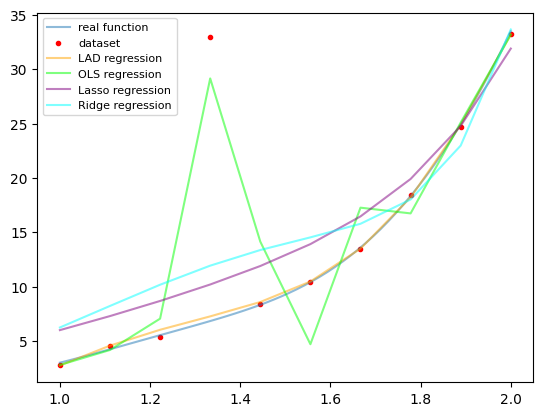



#############


W for LAD is :  [-13.07510348   2.9613169   11.25852386  10.12206023   0.89794342
  -9.4988265   -8.34537088  11.07681489  -2.65537343]


#############


W for OLS is :  [-8.41385105e+06  4.72090490e+07 -1.14879382e+08  1.58373037e+08
 -1.35309347e+08  7.33772986e+07 -2.46702237e+07  4.70263227e+06
 -3.89209327e+05]


#############


W for Lasso is :  [ 0.          0.          6.25324851  0.          0.         -0.
 -0.36972062 -0.01541845  0.1270512 ]


#############


W for Ridge is :  [-1.24229909  0.49476233  2.03194927  3.00723368  2.97671427  1.58042887
 -0.99947131 -2.96931804  1.35766852]


In [288]:
# exact data / real function

x_real = np.linspace(1,2,60)
y_real = (1/x_real) + x_real**5 + np.sin(2*np.pi*x_real) + 1

# Our dataset with noise

x_data = np.linspace(1,2,10)
y_data = (1/x_data) + x_data**5 + np.sin(2*np.pi*x_data) + 1 + 0.5*np.random.randn(10)*np.random.randn(10)

# Our dataset with outliers

y_data[3] = 33



# plot real data and dataset

plt.plot(x_real, y_real, label = "real function", alpha = 0.5)
plt.scatter(x_data,y_data,color = 'red',marker = '.', label = 'dataset')


# Polynomial degree 8

poly = PolynomialFeatures(degree= 8)
phi = poly.fit_transform(x_data.reshape(-1,1))

# LAD model

model1 = LADRegression(fit_intercept= False).fit(phi, y_data)
yhat1  = model1.predict(phi)

plt.plot(x_data, yhat1, label = "LAD regression", color = 'orange' , alpha = 0.5)

# OLS model

model2 = LinearRegression(fit_intercept= False).fit(phi, y_data)
yhat2 = model2.predict(phi) 

plt.plot(x_data, yhat2, label = "OLS regression", color = 'lime' , alpha = 0.5)


# Lasso model with alpha = 0.05

model3 = Lasso(alpha = 0.5, max_iter= 1000, fit_intercept= False).fit(phi,y_data)
yhat3 = model3.predict(phi)

plt.plot(x_data, yhat3, label = "Lasso regression", color = 'purple' , alpha = 0.5)

# Ridge model with alpha = 0.05

model4 = Ridge(alpha = 0.5, fit_intercept= False).fit(phi,y_data)
yhat4 = model4.predict(phi)

plt.plot(x_data, yhat4, label = "Ridge regression", color = 'aqua' , alpha = 0.5)


plt.legend(loc = 'best', prop = {'size' : 8})
plt.show()

# Print the different W s in each model

print("\n\n#############\n\n")

print('W for LAD is : ', model1.coef_)

print("\n\n#############\n\n")

print('W for OLS is : ', model2.coef_)

print("\n\n#############\n\n")

print('W for Lasso is : ', model3.coef_)


print("\n\n#############\n\n")

print('W for Ridge is : ', model4.coef_)


##  <font color = "#F3A505" > Results on our dummy dataset 

As you can see from the plot above, LAD performed well since it was less sensitive to the outlier, OLS is the worst. Ridge is also worse than Lasso since Lasso almost have the gest of the real function.   

    
As you can see :
    
$\bullet$ W for LAD is acceptable hence the best model is LAD (also according to the plot above).
    
$\bullet$ W for OLS is big which causes the model to overfit.
    
$\bullet$ W for Lasso have many 0 elements.
    
$\bullet$ W for Ridge is smooth.

#  <font color = "#F3A505" > Test On dataset3
    
<hr>
    

Once our 204x3 models are constructed we need to evaluate them using our test dataset. As mentioned before, dataset3 is our test datasets. To evaluate, we defince *evaluate* function which returns the RMSE and MAE for both train and test datasets.
    
$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(\hat y_i - y_i)^2}{n}}$


$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat y_i|$
    
This function is identical to the one we used on Q-Series2. RMSE and MAE can also be calculated using sklearn.

In [298]:
def evaluate( trainX , trainY , testX , testY, model):
    
        # Model is also added
 
        degree = model.n_features_in_ - 1
        
        trainX = trainX.values.reshape(-1,1)
        testX = testX.values.reshape(-1,1)
        
        N_tr = len(trainX)
        N_te = len(testX)
        
        phi_trX = polynomials[degree].fit_transform(trainX)
        phi_teX = polynomials[degree].fit_transform(testX)
        
        tr_yhat = model.predict(phi_trX)
        te_yhat  = model.predict(phi_teX)
        
        rmse_tr = np.sqrt(np.sum((tr_yhat - trainY)**2) / N_tr )
        rmse_te = np.sqrt(np.sum((te_yhat - testY)**2) / N_te )

        mae_tr = np.sum(np.abs(tr_yhat - trainY)) / N_tr
        
        mae_te = np.sum(np.abs(te_yhat - testY)) / N_te

        return rmse_tr , rmse_te ,mae_tr , mae_te 

# <font color = "#F3A505" > Results
    
<hr>
    
There are a set of goals we are willing to achieve.
    
1.  RMSE and MAE on both train and test based on $\alpha$

    
2. Best $\alpha$ based on $||W||$ and $||\Phi W - Y||_2^2$, compared to RidgeCV and LassoCV
  
    
3. Best $\alpha$ based on RidgeCV and LassoCV
    

4. Condition number of ($\Phi^T\Phi$) and ($\Phi^T\Phi + \alpha I$) , and $||\Phi^T\Phi + \alpha I - \Phi^T\Phi ||_F^2$

## <font color = "#F3A505" > Dataset 2 on 204 models.
    
   
First we plot RMSE and MAE on both train and test based on $\alpha$. 
    
Then we find the minimum RMSE and MAE to choose the best model.

Using RMSE and MAE we can find the best $\alpha$ for each Regularization model.

In [453]:
dataset_train = 'dataset2'
dataset_train_index = 2

dataset_test  = 'dataset3'
dataset_test_index = 3

degree =  'degree9'

###  <font color = "#F3A505" > plot RMSE and MAE on both train and test based on  ùõº

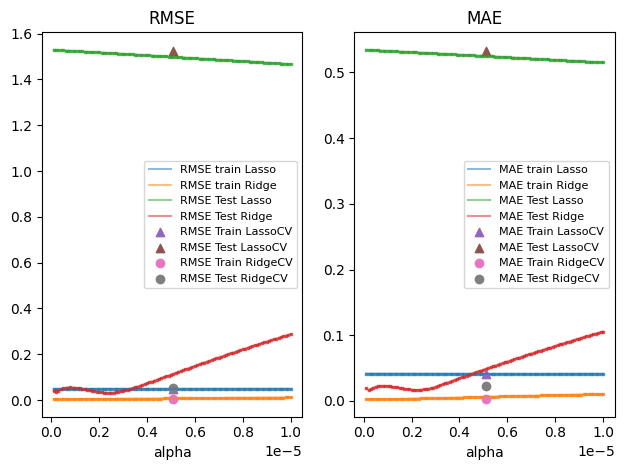

In [455]:
x_test = datasets[dataset_test_index]['x']
y_test = datasets[dataset_test_index]['t']

x_train = datasets[dataset_train_index]['x']
y_train = datasets[dataset_train_index]['t']

# Lasso
rmse_tr_l1_list = []
rmse_te_l1_list = []
mae_tr_l1_list = []
mae_te_l1_list = []

# Ridge
rmse_tr_l2_list = []
rmse_te_l2_list = []
mae_tr_l2_list = []
mae_te_l2_list = []


# Lasso and Ridge models

for _alpha in alphas:
    
    model_l1 = lasso_models[dataset_train][_alpha]
    model_l2 = ridge_models[dataset_train][_alpha]
    
    rmse_tr_l1 , rmse_te_l1 ,mae_tr_l1 , mae_te_l1  = evaluate(x_train,y_train,x_test,y_test,model_l1)
    rmse_tr_l2 , rmse_te_l2 ,mae_tr_l2 , mae_te_l2  = evaluate(x_train,y_train,x_test,y_test,model_l2)
    
    rmse_tr_l1_list.append(rmse_tr_l1)
    rmse_te_l1_list.append(rmse_te_l1)
    mae_tr_l1_list.append(mae_tr_l1)
    mae_te_l1_list.append(mae_te_l1)
    
    rmse_tr_l2_list.append(rmse_tr_l2)
    rmse_te_l2_list.append(rmse_te_l2)
    mae_tr_l2_list.append(mae_tr_l2)
    mae_te_l2_list.append(mae_te_l2)

    
# LassoCV and RidgeCV models

model_lassoCV = lasso_models[dataset_train]['LassoCV']
model_ridgeCV = ridge_models[dataset_train]['RidgeCV']

rmse_tr_lassocv , rmse_te_lassocv ,mae_tr_lassocv , mae_te_lassocv  = evaluate(x_train,y_train,x_test,y_test,model_lassoCV)
rmse_tr_ridgecv , rmse_te_ridgecv ,mae_tr_ridgecv , mae_te_ridgecv  = evaluate(x_train,y_train,x_test,y_test,model_ridgeCV)


# LAD and OLS models

model_lad = LAD_models[dataset_train]
model_ols = OLS_models[dataset_train]

rmse_tr_lad , rmse_te_lad ,mae_tr_lad , mae_te_lad  = evaluate(x_train,y_train,x_test,y_test,model_lad)
rmse_tr_ols , rmse_te_ols ,mae_tr_ols , mae_te_ols  = evaluate(x_train,y_train,x_test,y_test,model_ols)

fig, ax = plt.subplots(1,2) 


ax[0].plot(alphas, rmse_tr_l1_list, alpha = 0.5 , label = 'RMSE train Lasso')
ax[0].scatter(alphas, rmse_tr_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[0].plot(alphas, rmse_tr_l2_list, alpha = 0.5 , label = 'RMSE train Ridge')
ax[0].scatter(alphas, rmse_tr_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[0].plot(alphas, rmse_te_l1_list, alpha = 0.5 , label = 'RMSE Test Lasso')
ax[0].scatter(alphas, rmse_te_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[0].plot(alphas, rmse_te_l2_list, alpha = 0.5 , label = 'RMSE Test Ridge')
ax[0].scatter(alphas, rmse_te_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[0].scatter(alphas[50], rmse_tr_lassocv, marker = '^', label = 'RMSE Train LassoCV')
ax[0].scatter(alphas[50], rmse_te_lassocv, marker = '^', label = 'RMSE Test LassoCV')

ax[0].scatter(alphas[50], rmse_tr_ridgecv, marker = 'o', label = 'RMSE Train RidgeCV')
ax[0].scatter(alphas[50], rmse_te_ridgecv, marker = 'o', label = 'RMSE Test RidgeCV')

#ax[0].scatter(alphas[40], rmse_tr_lad, marker = 'o', label = 'RMSE Train LAD')
#ax[0].scatter(alphas[40], rmse_te_lad, marker = 'o', label = 'RMSE Test LAD')

#ax[0].scatter(alphas[30], rmse_tr_ols, marker = 'o', label = 'RMSE Train OLS')
#ax[0].scatter(alphas[30], rmse_te_ols, marker = 'o', label = 'RMSE Test OLS')


ax[0].legend(loc = 'best',prop = {'size' : 8})
ax[0].set_title('RMSE')
ax[0].set_xlabel('alpha')


ax[1].plot(alphas, mae_tr_l1_list, alpha = 0.5 , label = 'MAE train Lasso')
ax[1].scatter(alphas, mae_tr_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[1].plot(alphas, mae_tr_l2_list, alpha = 0.5 , label = 'MAE train Ridge')
ax[1].scatter(alphas, mae_tr_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[1].plot(alphas, mae_te_l1_list, alpha = 0.5 , label = 'MAE Test Lasso')
ax[1].scatter(alphas, mae_te_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[1].plot(alphas, mae_te_l2_list, alpha = 0.5 , label = 'MAE Test Ridge')
ax[1].scatter(alphas, mae_te_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[1].scatter(alphas[50], mae_tr_lassocv, marker = '^', label = 'MAE Train LassoCV')
ax[1].scatter(alphas[50], mae_te_lassocv, marker = '^', label = 'MAE Test LassoCV')

ax[1].scatter(alphas[50], mae_tr_ridgecv, marker = 'o', label = 'MAE Train RidgeCV')
ax[1].scatter(alphas[50], mae_te_ridgecv, marker = 'o', label = 'MAE Test RidgeCV')

#ax[1].scatter(alphas[40], mae_tr_lad, marker = 'o', label = 'MAE Train LAD')
#ax[1].scatter(alphas[40], mae_te_lad, marker = 'o', label = 'MAE Test LAD')

#ax[1].scatter(alphas[30], mae_tr_ols, marker = 'o', label = 'MAE Train OLS')
#ax[1].scatter(alphas[30], mae_te_ols, marker = 'o', label = 'MAE Test OLS')


ax[1].legend(loc = 'best',prop = {'size' : 8})
ax[1].set_title('MAE')
ax[1].set_xlabel('alpha')


fig.tight_layout()

plt.show()

### <font color = "#F3A505" > find the minimum RMSE and MAE to choose the best model

In [456]:
# Minimum RMSE and MAE on Train and Test (LAD) 

print('\n###########\n')
print('minimum RMSE on train (LAD model) : ', rmse_tr_lad)
print('minimum MAE on train (LAD model) : ', mae_tr_lad)
print('minimum RMSE on test (LAD model) : ', rmse_te_lad)
print('minimum MAE on test (LAD model) : ', mae_te_lad)

# Minimum RMSE and MAE on Train and Test (OLS)

print('\n###########\n')
print('minimum RMSE on train (OLS model) : ', rmse_tr_ols)
print('minimum MAE on train (OLS model) : ', mae_tr_ols)
print('minimum RMSE on test (OLS model) : ', rmse_te_ols)
print('minimum MAE on test (OLS model) : ', mae_te_ols)


# Minimum RMSE and MAE on Train and Test (Lasso)
# One alpha is elected based on our train data, then the rmse and mae for 
# that alpha is calculated and chosen as minimum value, even though it may not 
# be the actual minimum. 


alpha_index = pd.Series(rmse_tr_l1_list).idxmin()

print('\n###########\n')
print('minimum RMSE on train (Lasso models) : ', rmse_tr_l1_list[alpha_index])
print('minimum MAE on train (Lasso models) : ', mae_tr_l1_list[alpha_index])
print('minimum RMSE on test (Lasso models) : ', rmse_te_l1_list[alpha_index])
print('minimum MAE on test (Lasso models) : ', mae_te_l1_list[alpha_index])


# Minimum RMSE and MAE on Train and Test (LassoCV)

print('\n###########\n')
print('minimum RMSE on train (LassoCV models) : ', rmse_tr_lassocv)
print('minimum MAE on train (LassoCV models) : ', mae_tr_lassocv)
print('minimum RMSE on test (LassoCV models) : ', rmse_te_lassocv)
print('minimum MAE on test (LassoCV models) : ', mae_te_lassocv)


# Minimum RMSE and MAE on Train and Test (Ridge)
# One alpha is elected based on our train data, then the rmse and mae for 
# that alpha is calculated and chosen as minimum value, even though it may not 
# be the actual minimum.


alpha_index = pd.Series(rmse_tr_l2_list).idxmin()

print('\n###########\n')
print('minimum RMSE on train (Ridge models) : ', rmse_tr_l2_list[alpha_index])
print('minimum MAE on train (Ridge models) : ', mae_tr_l2_list[alpha_index])
print('minimum RMSE on test (Ridge models) : ', rmse_te_l2_list[alpha_index])
print('minimum MAE on test (Ridge models) : ', mae_te_l2_list[alpha_index])


# Minimum RMSE and MAE on Train and Test (RidgeCV)

print('\n###########\n')
print('minimum RMSE on train (RidgeCV models) : ', rmse_tr_ridgecv)
print('minimum MAE on train (RidgeCV models) : ', mae_tr_ridgecv)
print('minimum RMSE on test (RidgeCV models) : ', rmse_te_ridgecv)
print('minimum MAE on test (RidgeCV models) : ', mae_te_ridgecv)



###########

minimum RMSE on train (LAD model) :  0.0058098531931605555
minimum MAE on train (LAD model) :  0.0038365622552581887
minimum RMSE on test (LAD model) :  0.23753651378082863
minimum MAE on test (LAD model) :  0.0800292110062792

###########

minimum RMSE on train (OLS model) :  7.206990638195545e-12
minimum MAE on train (OLS model) :  4.5981801699568335e-12
minimum RMSE on test (OLS model) :  32.13821511572633
minimum MAE on test (OLS model) :  8.985899549248348

###########

minimum RMSE on train (Lasso models) :  0.0489279635551478
minimum MAE on train (Lasso models) :  0.04159815043019906
minimum RMSE on test (Lasso models) :  1.5292771049748097
minimum MAE on test (Lasso models) :  0.5343122087806433

###########

minimum RMSE on train (LassoCV models) :  0.0489935503630718
minimum MAE on train (LassoCV models) :  0.04152134545301548
minimum RMSE on test (LassoCV models) :  1.5219443842459253
minimum MAE on test (LassoCV models) :  0.5320452287491539

###########

mini

### <font color = "#F3A505" > compare best $\alpha$ with RidgeCV and LassoCV.
    
It is possible that minimum is not strict, and we might have a streak. 

In [457]:
lassocv_model = lasso_models[dataset_train]['LassoCV']
best_lassocv_alpha = lassocv_model.alpha_
ridgecv_model = ridge_models[dataset_train]['RidgeCV']
best_ridgecv_alpha = ridgecv_model.alpha_


alpha_index_lasso = pd.Series(rmse_tr_l1_list).idxmin()
best_lasso_alpha = alphas[alpha_index_lasso]


alpha_index_ridge = pd.Series(rmse_tr_l2_list).idxmin()
best_ridge_alpha = alphas[alpha_index_ridge]

print('\n###########\n')


print('Lasso best alpha is : ', best_lasso_alpha)
print('LassoCV best alpha is : ', best_lassocv_alpha)
print('Ridge best alpha is : ', best_ridge_alpha)
print('RidgeCV best alpha is : ', best_ridgecv_alpha)



###########

Lasso best alpha is :  1e-07
LassoCV best alpha is :  1.2999999999999998e-06
Ridge best alpha is :  1e-07
RidgeCV best alpha is :  6e-07


### <font color = "#F3A505" > compare best $||W||_2^2$ with $||\Phi W - Y ||_2^2$ and RidgeCV.


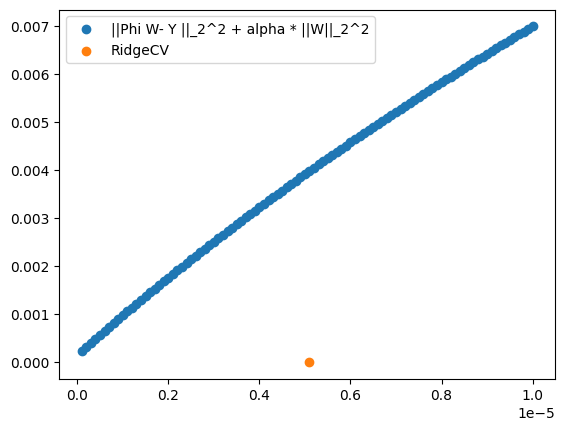

In [458]:
f1 = []
f2 = []
f  = []
for _alpha in alphas:
    
    model = ridge_models[dataset_train][_alpha]
    W = model.coef_
    f1.append(np.linalg.norm(W, 2)**2)
    
    temp = np.dot(Phi[dataset_train][degree], W) - Y[dataset_train]
    f2.append(np.linalg.norm(temp,2)**2)
    
    
    f.append(np.linalg.norm(temp,2)**2 + _alpha * np.linalg.norm(W, 2)**2)

#plt.plot(alphas, f1)
#plt.plot(alphas, f2)
plt.scatter(alphas, f , label = '||Phi W- Y ||_2^2 + alpha * ||W||_2^2')
plt.scatter(alphas[50], ridge_models[dataset_train]['RidgeCV'].alpha_, label = 'RidgeCV')
plt.legend(loc = 'best')
plt.show()
    

### <font color = "#F3A505" > compare condition numbers for $\Phi^T\Phi$ and $\Phi^T\Phi + \alpha I$ and $||\alpha I||_F^2$ of.


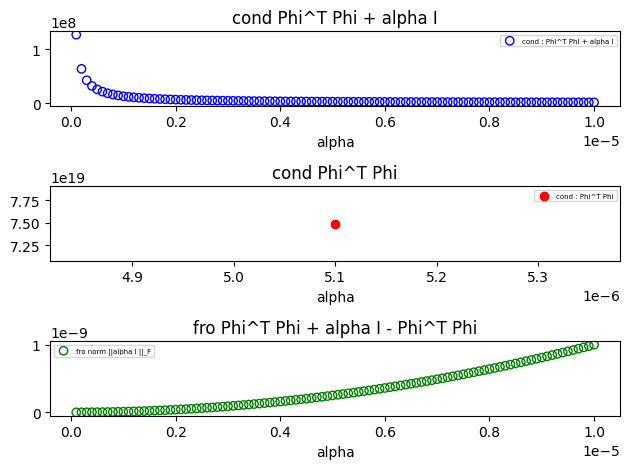

In [460]:
phiT = np.transpose(Phi[dataset_train][degree])
phi  = Phi[dataset_train][degree]

cond1 = np.linalg.cond(np.dot(phiT,phi))

cond2 = []
fro_norm = []



for _alpha in alphas:
    iden = _alpha * np.identity(phi.shape[1])
    
    cond2.append(np.linalg.cond(np.dot(phiT,phi) + iden))
    temp = np.dot(phiT,phi) + iden - np.dot(phiT,phi)
    fro_norm.append(np.linalg.norm(temp, 'fro')**2)

    
fig , ax = plt.subplots(3,1)
    
ax[0].scatter(alphas, cond2,facecolors='none', edgecolors='blue' , label = 'cond : Phi^T Phi + alpha I')
ax[0].set_xlabel('alpha')
ax[0].set_title('cond Phi^T Phi + alpha I')

ax[1].scatter(alphas[50],cond1,color = 'red', label = 'cond : Phi^T Phi')
ax[1].set_xlabel('alpha')
ax[1].set_title('cond Phi^T Phi')

ax[2].scatter(alphas, fro_norm, marker = 'o', facecolors='none', edgecolors='green', label = 'fro norm ||alpha I ||_F')
ax[2].set_xlabel('alpha')
ax[2].set_title('fro Phi^T Phi + alpha I - Phi^T Phi')

ax[0].legend(loc = 'best', prop = {'size' : 5})
ax[1].legend(loc = 'best', prop = {'size' : 5})
ax[2].legend(loc = 'best', prop = {'size' : 5})


fig.tight_layout()
plt.show()


### <font color = "#F3A505" > visualize the result


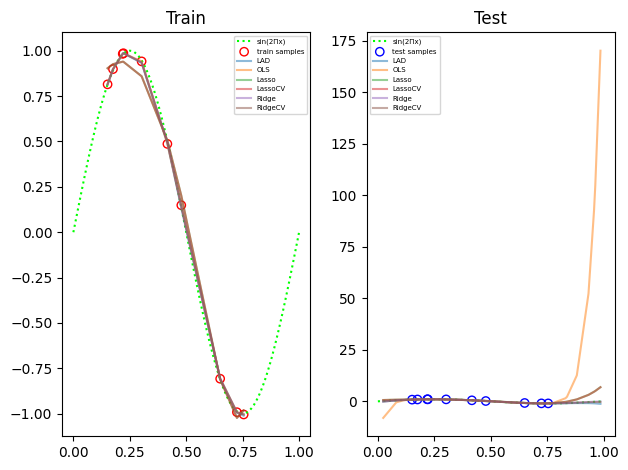

In [462]:
x = np.arange(0,1+0.01,0.01)
y = np.sin(2*np.pi*x)

x_test = datasets[dataset_test_index]['x']
y_test = datasets[dataset_test_index]['t']

x_train = datasets[dataset_train_index]['x']
y_train = datasets[dataset_train_index]['t']



# LAD model 

model_lad = LAD_models[dataset_train]
yhat_lad_tr  = model_lad.predict(Phi[dataset_train][degree])
yhat_lad_te  = model_lad.predict(Phi[dataset_test][degree])

# OLS model

model_ols = OLS_models[dataset_train]
yhat_ols_tr  = model_ols.predict(Phi[dataset_train][degree])
yhat_ols_te  = model_ols.predict(Phi[dataset_test][degree])

# best Lasso model according to train

model_best_lasso = lasso_models[dataset_train][alphas[alpha_index_lasso]]
yhat_lasso_tr  = model_best_lasso.predict(Phi[dataset_train][degree])
yhat_lasso_te  = model_best_lasso.predict(Phi[dataset_test][degree])

# LassoCV model

model_lassoCV = lasso_models[dataset_train]['LassoCV']
yhat_lassocv_tr  = model_lassoCV.predict(Phi[dataset_train][degree])
yhat_lassocv_te  = model_lassoCV.predict(Phi[dataset_test][degree])

# best Ridge model according to train

model_best_ridge = ridge_models[dataset_train][alphas[alpha_index_ridge]]
yhat_ridge_tr  = model_best_ridge.predict(Phi[dataset_train][degree])
yhat_ridge_te  = model_best_ridge.predict(Phi[dataset_test][degree])

# RidgeCV model

model_ridgeCV = ridge_models[dataset_train]['RidgeCV']
yhat_ridgecv_tr  = model_ridgeCV.predict(Phi[dataset_train][degree])
yhat_ridgecv_te  = model_ridgeCV.predict(Phi[dataset_test][degree])


fig , ax = plt.subplots(1,2)


ax[0].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Œ†x)')
ax[0].scatter(x_train, y_train, facecolors='none', edgecolors='red', label = 'train samples')
ax[0].plot(x_train, yhat_lad_tr, label = 'LAD', alpha = 0.5)
ax[0].plot(x_train, yhat_ols_tr, label = 'OLS', alpha = 0.5)
ax[0].plot(x_train, yhat_lasso_tr, label = 'Lasso', alpha = 0.5)
ax[0].plot(x_train, yhat_lassocv_tr, label = 'LassoCV', alpha = 0.5)
ax[0].plot(x_train, yhat_ridge_tr, label = 'Ridge', alpha = 0.5)
ax[0].plot(x_train, yhat_ridgecv_tr, label = 'RidgeCV', alpha = 0.5)

ax[0].set_title('Train')
ax[0].legend(loc = 'best', prop = {'size' : 5})


ax[1].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Œ†x)')
ax[1].scatter(x_train, y_train, facecolors='none', edgecolors='blue', label = 'test samples')
ax[1].plot(x_test, yhat_lad_te, label = 'LAD', alpha = 0.5)
ax[1].plot(x_test, yhat_ols_te, label = 'OLS', alpha = 0.5)
ax[1].plot(x_test, yhat_lasso_te, label = 'Lasso', alpha = 0.5)
ax[1].plot(x_test, yhat_lassocv_te, label = 'LassoCV', alpha = 0.5)
ax[1].plot(x_test, yhat_ridge_te, label = 'Ridge', alpha = 0.5)
ax[1].plot(x_test, yhat_ridgecv_te, label = 'RidgeCV', alpha = 0.5)

ax[1].set_title('Test')
ax[1].legend(loc = 'best', prop = {'size' : 5})


fig.tight_layout()
plt.show()


## <font color = "#F3A505" > Dataset 4 on 204 models.
    
   
First we plot RMSE and MAE on both train and test based on $\alpha$. 
    
Then we find the minimum RMSE and MAE to choose the best model.

Using RMSE and MAE we can find the best $\alpha$ for each Regularization model.

In [477]:
dataset_train = 'dataset4'
dataset_train_index = 4

dataset_test  = 'dataset3'
dataset_test_index = 3

degree =  'degree8'

###  <font color = "#F3A505" > plot RMSE and MAE on both train and test based on  ùõº

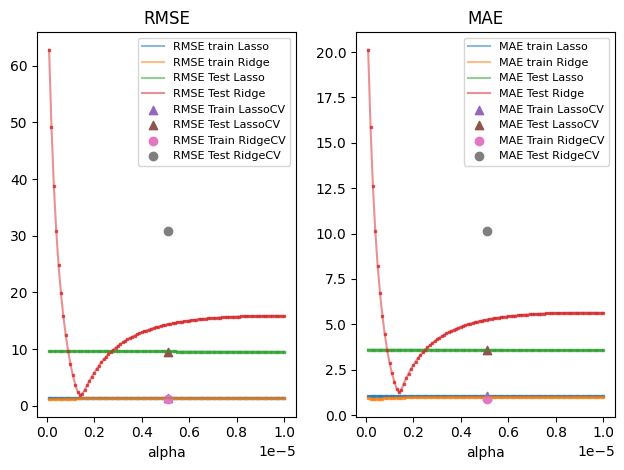

In [478]:
x_test = datasets[dataset_test_index]['x']
y_test = datasets[dataset_test_index]['t']

x_train = datasets[dataset_train_index]['x']
y_train = datasets[dataset_train_index]['t']

# Lasso
rmse_tr_l1_list = []
rmse_te_l1_list = []
mae_tr_l1_list = []
mae_te_l1_list = []

# Ridge
rmse_tr_l2_list = []
rmse_te_l2_list = []
mae_tr_l2_list = []
mae_te_l2_list = []


# Lasso and Ridge models

for _alpha in alphas:
    
    model_l1 = lasso_models[dataset_train][_alpha]
    model_l2 = ridge_models[dataset_train][_alpha]
    
    rmse_tr_l1 , rmse_te_l1 ,mae_tr_l1 , mae_te_l1  = evaluate(x_train,y_train,x_test,y_test,model_l1)
    rmse_tr_l2 , rmse_te_l2 ,mae_tr_l2 , mae_te_l2  = evaluate(x_train,y_train,x_test,y_test,model_l2)
    
    rmse_tr_l1_list.append(rmse_tr_l1)
    rmse_te_l1_list.append(rmse_te_l1)
    mae_tr_l1_list.append(mae_tr_l1)
    mae_te_l1_list.append(mae_te_l1)
    
    rmse_tr_l2_list.append(rmse_tr_l2)
    rmse_te_l2_list.append(rmse_te_l2)
    mae_tr_l2_list.append(mae_tr_l2)
    mae_te_l2_list.append(mae_te_l2)

    
# LassoCV and RidgeCV models

model_lassoCV = lasso_models[dataset_train]['LassoCV']
model_ridgeCV = ridge_models[dataset_train]['RidgeCV']

rmse_tr_lassocv , rmse_te_lassocv ,mae_tr_lassocv , mae_te_lassocv  = evaluate(x_train,y_train,x_test,y_test,model_lassoCV)
rmse_tr_ridgecv , rmse_te_ridgecv ,mae_tr_ridgecv , mae_te_ridgecv  = evaluate(x_train,y_train,x_test,y_test,model_ridgeCV)


# LAD and OLS models

model_lad = LAD_models[dataset_train]
model_ols = OLS_models[dataset_train]

rmse_tr_lad , rmse_te_lad ,mae_tr_lad , mae_te_lad  = evaluate(x_train,y_train,x_test,y_test,model_lad)
rmse_tr_ols , rmse_te_ols ,mae_tr_ols , mae_te_ols  = evaluate(x_train,y_train,x_test,y_test,model_ols)

fig, ax = plt.subplots(1,2) 


ax[0].plot(alphas, rmse_tr_l1_list, alpha = 0.5 , label = 'RMSE train Lasso')
ax[0].scatter(alphas, rmse_tr_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[0].plot(alphas, rmse_tr_l2_list, alpha = 0.5 , label = 'RMSE train Ridge')
ax[0].scatter(alphas, rmse_tr_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[0].plot(alphas, rmse_te_l1_list, alpha = 0.5 , label = 'RMSE Test Lasso')
ax[0].scatter(alphas, rmse_te_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[0].plot(alphas, rmse_te_l2_list, alpha = 0.5 , label = 'RMSE Test Ridge')
ax[0].scatter(alphas, rmse_te_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[0].scatter(alphas[50], rmse_tr_lassocv, marker = '^', label = 'RMSE Train LassoCV')
ax[0].scatter(alphas[50], rmse_te_lassocv, marker = '^', label = 'RMSE Test LassoCV')

ax[0].scatter(alphas[50], rmse_tr_ridgecv, marker = 'o', label = 'RMSE Train RidgeCV')
ax[0].scatter(alphas[50], rmse_te_ridgecv, marker = 'o', label = 'RMSE Test RidgeCV')

#ax[0].scatter(alphas[40], rmse_tr_lad, marker = 'o', label = 'RMSE Train LAD')
#ax[0].scatter(alphas[40], rmse_te_lad, marker = 'o', label = 'RMSE Test LAD')

#ax[0].scatter(alphas[30], rmse_tr_ols, marker = 'o', label = 'RMSE Train OLS')
#ax[0].scatter(alphas[30], rmse_te_ols, marker = 'o', label = 'RMSE Test OLS')


ax[0].legend(loc = 'best',prop = {'size' : 8})
ax[0].set_title('RMSE')
ax[0].set_xlabel('alpha')


ax[1].plot(alphas, mae_tr_l1_list, alpha = 0.5 , label = 'MAE train Lasso')
ax[1].scatter(alphas, mae_tr_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[1].plot(alphas, mae_tr_l2_list, alpha = 0.5 , label = 'MAE train Ridge')
ax[1].scatter(alphas, mae_tr_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[1].plot(alphas, mae_te_l1_list, alpha = 0.5 , label = 'MAE Test Lasso')
ax[1].scatter(alphas, mae_te_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[1].plot(alphas, mae_te_l2_list, alpha = 0.5 , label = 'MAE Test Ridge')
ax[1].scatter(alphas, mae_te_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[1].scatter(alphas[50], mae_tr_lassocv, marker = '^', label = 'MAE Train LassoCV')
ax[1].scatter(alphas[50], mae_te_lassocv, marker = '^', label = 'MAE Test LassoCV')

ax[1].scatter(alphas[50], mae_tr_ridgecv, marker = 'o', label = 'MAE Train RidgeCV')
ax[1].scatter(alphas[50], mae_te_ridgecv, marker = 'o', label = 'MAE Test RidgeCV')

#ax[1].scatter(alphas[40], mae_tr_lad, marker = 'o', label = 'MAE Train LAD')
#ax[1].scatter(alphas[40], mae_te_lad, marker = 'o', label = 'MAE Test LAD')

#ax[1].scatter(alphas[30], mae_tr_ols, marker = 'o', label = 'MAE Train OLS')
#ax[1].scatter(alphas[30], mae_te_ols, marker = 'o', label = 'MAE Test OLS')


ax[1].legend(loc = 'best',prop = {'size' : 8})
ax[1].set_title('MAE')
ax[1].set_xlabel('alpha')


fig.tight_layout()

plt.show()

### <font color = "#F3A505" > find the minimum RMSE and MAE to choose the best model

In [479]:
# Minimum RMSE and MAE on Train and Test (LAD) 

print('\n###########\n')
print('minimum RMSE on train (LAD model) : ', rmse_tr_lad)
print('minimum MAE on train (LAD model) : ', mae_tr_lad)
print('minimum RMSE on test (LAD model) : ', rmse_te_lad)
print('minimum MAE on test (LAD model) : ', mae_te_lad)

# Minimum RMSE and MAE on Train and Test (OLS)

print('\n###########\n')
print('minimum RMSE on train (OLS model) : ', rmse_tr_ols)
print('minimum MAE on train (OLS model) : ', mae_tr_ols)
print('minimum RMSE on test (OLS model) : ', rmse_te_ols)
print('minimum MAE on test (OLS model) : ', mae_te_ols)


# Minimum RMSE and MAE on Train and Test (Lasso)
# One alpha is elected based on our train data, then the rmse and mae for 
# that alpha is calculated and chosen as minimum value, even though it may not 
# be the actual minimum. 


alpha_index = pd.Series(rmse_tr_l1_list).idxmin()

print('\n###########\n')
print('minimum RMSE on train (Lasso models) : ', rmse_tr_l1_list[alpha_index])
print('minimum MAE on train (Lasso models) : ', mae_tr_l1_list[alpha_index])
print('minimum RMSE on test (Lasso models) : ', rmse_te_l1_list[alpha_index])
print('minimum MAE on test (Lasso models) : ', mae_te_l1_list[alpha_index])


# Minimum RMSE and MAE on Train and Test (LassoCV)

print('\n###########\n')
print('minimum RMSE on train (LassoCV models) : ', rmse_tr_lassocv)
print('minimum MAE on train (LassoCV models) : ', mae_tr_lassocv)
print('minimum RMSE on test (LassoCV models) : ', rmse_te_lassocv)
print('minimum MAE on test (LassoCV models) : ', mae_te_lassocv)


# Minimum RMSE and MAE on Train and Test (Ridge)
# One alpha is elected based on our train data, then the rmse and mae for 
# that alpha is calculated and chosen as minimum value, even though it may not 
# be the actual minimum.


alpha_index = pd.Series(rmse_tr_l2_list).idxmin()

print('\n###########\n')
print('minimum RMSE on train (Ridge models) : ', rmse_tr_l2_list[alpha_index])
print('minimum MAE on train (Ridge models) : ', mae_tr_l2_list[alpha_index])
print('minimum RMSE on test (Ridge models) : ', rmse_te_l2_list[alpha_index])
print('minimum MAE on test (Ridge models) : ', mae_te_l2_list[alpha_index])


# Minimum RMSE and MAE on Train and Test (RidgeCV)

print('\n###########\n')
print('minimum RMSE on train (RidgeCV models) : ', rmse_tr_ridgecv)
print('minimum MAE on train (RidgeCV models) : ', mae_tr_ridgecv)
print('minimum RMSE on test (RidgeCV models) : ', rmse_te_ridgecv)
print('minimum MAE on test (RidgeCV models) : ', mae_te_ridgecv)



###########

minimum RMSE on train (LAD model) :  1.6556702151783034
minimum MAE on train (LAD model) :  0.7568079748911751
minimum RMSE on test (LAD model) :  1.0468550161776682
minimum MAE on test (LAD model) :  0.3586025356863712

###########

minimum RMSE on train (OLS model) :  2.2931520795186748e-07
minimum MAE on train (OLS model) :  1.4095879794229217e-07
minimum RMSE on test (OLS model) :  383527.1348325835
minimum MAE on test (OLS model) :  106819.39619467959

###########

minimum RMSE on train (Lasso models) :  1.470709352010634
minimum MAE on train (Lasso models) :  1.0471503873259944
minimum RMSE on test (Lasso models) :  9.653111845203252
minimum MAE on test (Lasso models) :  3.606375718318535

###########

minimum RMSE on train (LassoCV models) :  1.470827926766055
minimum MAE on train (LassoCV models) :  1.0463902274198449
minimum RMSE on test (LassoCV models) :  9.548764334315495
minimum MAE on test (LassoCV models) :  3.571055294320455

###########

minimum RMSE on t

### <font color = "#F3A505" > compare best $\alpha$ with RidgeCV and LassoCV.
    
It is possible that minimum is not strict, and we might have a streak. 

In [480]:
lassocv_model = lasso_models[dataset_train]['LassoCV']
best_lassocv_alpha = lassocv_model.alpha_
ridgecv_model = ridge_models[dataset_train]['RidgeCV']
best_ridgecv_alpha = ridgecv_model.alpha_


alpha_index_lasso = pd.Series(rmse_tr_l1_list).idxmin()
best_lasso_alpha = alphas[alpha_index_lasso]


alpha_index_ridge = pd.Series(rmse_tr_l2_list).idxmin()
best_ridge_alpha = alphas[alpha_index_ridge]

print('\n###########\n')


print('Lasso best alpha is : ', best_lasso_alpha)
print('LassoCV best alpha is : ', best_lassocv_alpha)
print('Ridge best alpha is : ', best_ridge_alpha)
print('RidgeCV best alpha is : ', best_ridgecv_alpha)



###########

Lasso best alpha is :  1e-07
LassoCV best alpha is :  1e-05
Ridge best alpha is :  1e-07
RidgeCV best alpha is :  4e-07


### <font color = "#F3A505" > compare best $||W||_2^2$ with $||\Phi W - Y ||_2^2$ and RidgeCV.


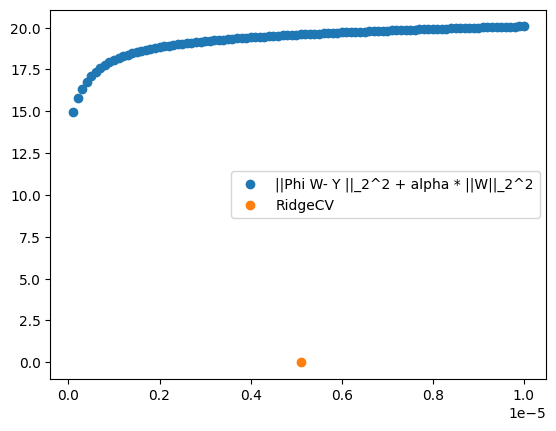

In [481]:
f1 = []
f2 = []
f  = []
for _alpha in alphas:
    
    model = ridge_models[dataset_train][_alpha]
    W = model.coef_
    f1.append(np.linalg.norm(W, 2)**2)
    
    temp = np.dot(Phi[dataset_train][degree], W) - Y[dataset_train]
    f2.append(np.linalg.norm(temp,2)**2)
    
    
    f.append(np.linalg.norm(temp,2)**2 + _alpha * np.linalg.norm(W, 2)**2)

#plt.plot(alphas, f1)
#plt.plot(alphas, f2)
plt.scatter(alphas, f , label = '||Phi W- Y ||_2^2 + alpha * ||W||_2^2')
plt.scatter(alphas[50], ridge_models[dataset_train]['RidgeCV'].alpha_, label = 'RidgeCV')
plt.legend(loc = 'best')
plt.show()
    

### <font color = "#F3A505" > compare condition numbers for $\Phi^T\Phi$ and $\Phi^T\Phi + \alpha I$ and $||\alpha I||_F^2$ of.


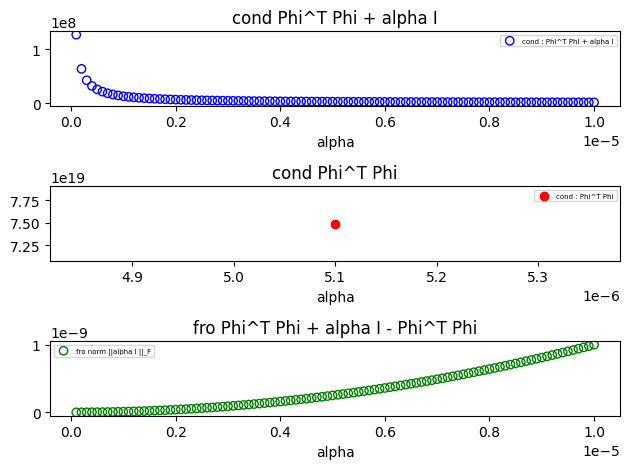

In [482]:
phiT = np.transpose(Phi[dataset_train][degree])
phi  = Phi[dataset_train][degree]

cond1 = np.linalg.cond(np.dot(phiT,phi))

cond2 = []
fro_norm = []



for _alpha in alphas:
    iden = _alpha * np.identity(phi.shape[1])
    
    cond2.append(np.linalg.cond(np.dot(phiT,phi) + iden))
    temp = np.dot(phiT,phi) + iden - np.dot(phiT,phi)
    fro_norm.append(np.linalg.norm(temp, 'fro')**2)

    
fig , ax = plt.subplots(3,1)
    
ax[0].scatter(alphas, cond2,facecolors='none', edgecolors='blue' , label = 'cond : Phi^T Phi + alpha I')
ax[0].set_xlabel('alpha')
ax[0].set_title('cond Phi^T Phi + alpha I')

ax[1].scatter(alphas[50],cond1,color = 'red', label = 'cond : Phi^T Phi')
ax[1].set_xlabel('alpha')
ax[1].set_title('cond Phi^T Phi')

ax[2].scatter(alphas, fro_norm, marker = 'o', facecolors='none', edgecolors='green', label = 'fro norm ||alpha I ||_F')
ax[2].set_xlabel('alpha')
ax[2].set_title('fro Phi^T Phi + alpha I - Phi^T Phi')

ax[0].legend(loc = 'best', prop = {'size' : 5})
ax[1].legend(loc = 'best', prop = {'size' : 5})
ax[2].legend(loc = 'best', prop = {'size' : 5})


fig.tight_layout()
plt.show()


### <font color = "#F3A505" > visualize the result


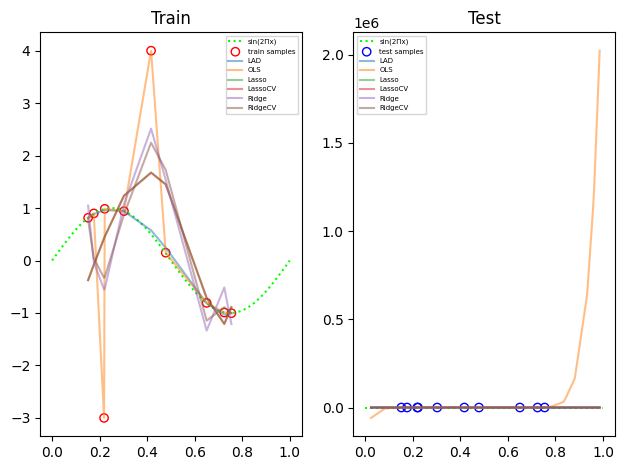

In [483]:
x = np.arange(0,1+0.01,0.01)
y = np.sin(2*np.pi*x)

x_test = datasets[dataset_test_index]['x']
y_test = datasets[dataset_test_index]['t']

x_train = datasets[dataset_train_index]['x']
y_train = datasets[dataset_train_index]['t']



# LAD model 

model_lad = LAD_models[dataset_train]
yhat_lad_tr  = model_lad.predict(Phi[dataset_train][degree])
yhat_lad_te  = model_lad.predict(Phi[dataset_test][degree])

# OLS model

model_ols = OLS_models[dataset_train]
yhat_ols_tr  = model_ols.predict(Phi[dataset_train][degree])
yhat_ols_te  = model_ols.predict(Phi[dataset_test][degree])

# best Lasso model according to train

model_best_lasso = lasso_models[dataset_train][alphas[alpha_index_lasso]]
yhat_lasso_tr  = model_best_lasso.predict(Phi[dataset_train][degree])
yhat_lasso_te  = model_best_lasso.predict(Phi[dataset_test][degree])

# LassoCV model

model_lassoCV = lasso_models[dataset_train]['LassoCV']
yhat_lassocv_tr  = model_lassoCV.predict(Phi[dataset_train][degree])
yhat_lassocv_te  = model_lassoCV.predict(Phi[dataset_test][degree])

# best Ridge model according to train

model_best_ridge = ridge_models[dataset_train][alphas[alpha_index_ridge]]
yhat_ridge_tr  = model_best_ridge.predict(Phi[dataset_train][degree])
yhat_ridge_te  = model_best_ridge.predict(Phi[dataset_test][degree])

# RidgeCV model

model_ridgeCV = ridge_models[dataset_train]['RidgeCV']
yhat_ridgecv_tr  = model_ridgeCV.predict(Phi[dataset_train][degree])
yhat_ridgecv_te  = model_ridgeCV.predict(Phi[dataset_test][degree])


fig , ax = plt.subplots(1,2)


ax[0].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Œ†x)')
ax[0].scatter(x_train, y_train, facecolors='none', edgecolors='red', label = 'train samples')
ax[0].plot(x_train, yhat_lad_tr, label = 'LAD', alpha = 0.5)
ax[0].plot(x_train, yhat_ols_tr, label = 'OLS', alpha = 0.5)
ax[0].plot(x_train, yhat_lasso_tr, label = 'Lasso', alpha = 0.5)
ax[0].plot(x_train, yhat_lassocv_tr, label = 'LassoCV', alpha = 0.5)
ax[0].plot(x_train, yhat_ridge_tr, label = 'Ridge', alpha = 0.5)
ax[0].plot(x_train, yhat_ridgecv_tr, label = 'RidgeCV', alpha = 0.5)

ax[0].set_title('Train')
ax[0].legend(loc = 'best', prop = {'size' : 5})


ax[1].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Œ†x)')
ax[1].scatter(x_train, y_train, facecolors='none', edgecolors='blue', label = 'test samples')
ax[1].plot(x_test, yhat_lad_te, label = 'LAD', alpha = 0.5)
ax[1].plot(x_test, yhat_ols_te, label = 'OLS', alpha = 0.5)
ax[1].plot(x_test, yhat_lasso_te, label = 'Lasso', alpha = 0.5)
ax[1].plot(x_test, yhat_lassocv_te, label = 'LassoCV', alpha = 0.5)
ax[1].plot(x_test, yhat_ridge_te, label = 'Ridge', alpha = 0.5)
ax[1].plot(x_test, yhat_ridgecv_te, label = 'RidgeCV', alpha = 0.5)

ax[1].set_title('Test')
ax[1].legend(loc = 'best', prop = {'size' : 5})


fig.tight_layout()
plt.show()


## <font color = "#F3A505" > Dataset 5 on 204 models.
    
   
First we plot RMSE and MAE on both train and test based on $\alpha$. 
    
Then we find the minimum RMSE and MAE to choose the best model.

Using RMSE and MAE we can find the best $\alpha$ for each Regularization model.

In [485]:
dataset_train = 'dataset5'
dataset_train_index = 5

dataset_test  = 'dataset3'
dataset_test_index = 3

degree =  'degree9'

###  <font color = "#F3A505" > plot RMSE and MAE on both train and test based on  ùõº

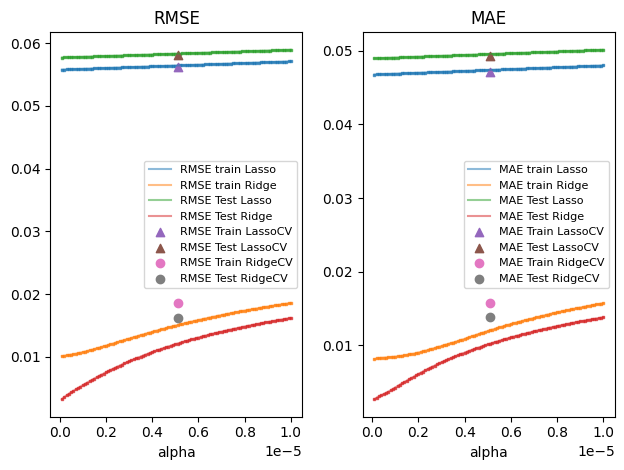

In [486]:
x_test = datasets[dataset_test_index]['x']
y_test = datasets[dataset_test_index]['t']

x_train = datasets[dataset_train_index]['x']
y_train = datasets[dataset_train_index]['t']

# Lasso
rmse_tr_l1_list = []
rmse_te_l1_list = []
mae_tr_l1_list = []
mae_te_l1_list = []

# Ridge
rmse_tr_l2_list = []
rmse_te_l2_list = []
mae_tr_l2_list = []
mae_te_l2_list = []


# Lasso and Ridge models

for _alpha in alphas:
    
    model_l1 = lasso_models[dataset_train][_alpha]
    model_l2 = ridge_models[dataset_train][_alpha]
    
    rmse_tr_l1 , rmse_te_l1 ,mae_tr_l1 , mae_te_l1  = evaluate(x_train,y_train,x_test,y_test,model_l1)
    rmse_tr_l2 , rmse_te_l2 ,mae_tr_l2 , mae_te_l2  = evaluate(x_train,y_train,x_test,y_test,model_l2)
    
    rmse_tr_l1_list.append(rmse_tr_l1)
    rmse_te_l1_list.append(rmse_te_l1)
    mae_tr_l1_list.append(mae_tr_l1)
    mae_te_l1_list.append(mae_te_l1)
    
    rmse_tr_l2_list.append(rmse_tr_l2)
    rmse_te_l2_list.append(rmse_te_l2)
    mae_tr_l2_list.append(mae_tr_l2)
    mae_te_l2_list.append(mae_te_l2)

    
# LassoCV and RidgeCV models

model_lassoCV = lasso_models[dataset_train]['LassoCV']
model_ridgeCV = ridge_models[dataset_train]['RidgeCV']

rmse_tr_lassocv , rmse_te_lassocv ,mae_tr_lassocv , mae_te_lassocv  = evaluate(x_train,y_train,x_test,y_test,model_lassoCV)
rmse_tr_ridgecv , rmse_te_ridgecv ,mae_tr_ridgecv , mae_te_ridgecv  = evaluate(x_train,y_train,x_test,y_test,model_ridgeCV)


# LAD and OLS models

model_lad = LAD_models[dataset_train]
model_ols = OLS_models[dataset_train]

rmse_tr_lad , rmse_te_lad ,mae_tr_lad , mae_te_lad  = evaluate(x_train,y_train,x_test,y_test,model_lad)
rmse_tr_ols , rmse_te_ols ,mae_tr_ols , mae_te_ols  = evaluate(x_train,y_train,x_test,y_test,model_ols)

fig, ax = plt.subplots(1,2) 


ax[0].plot(alphas, rmse_tr_l1_list, alpha = 0.5 , label = 'RMSE train Lasso')
ax[0].scatter(alphas, rmse_tr_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[0].plot(alphas, rmse_tr_l2_list, alpha = 0.5 , label = 'RMSE train Ridge')
ax[0].scatter(alphas, rmse_tr_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[0].plot(alphas, rmse_te_l1_list, alpha = 0.5 , label = 'RMSE Test Lasso')
ax[0].scatter(alphas, rmse_te_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[0].plot(alphas, rmse_te_l2_list, alpha = 0.5 , label = 'RMSE Test Ridge')
ax[0].scatter(alphas, rmse_te_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[0].scatter(alphas[50], rmse_tr_lassocv, marker = '^', label = 'RMSE Train LassoCV')
ax[0].scatter(alphas[50], rmse_te_lassocv, marker = '^', label = 'RMSE Test LassoCV')

ax[0].scatter(alphas[50], rmse_tr_ridgecv, marker = 'o', label = 'RMSE Train RidgeCV')
ax[0].scatter(alphas[50], rmse_te_ridgecv, marker = 'o', label = 'RMSE Test RidgeCV')

#ax[0].scatter(alphas[40], rmse_tr_lad, marker = 'o', label = 'RMSE Train LAD')
#ax[0].scatter(alphas[40], rmse_te_lad, marker = 'o', label = 'RMSE Test LAD')

#ax[0].scatter(alphas[30], rmse_tr_ols, marker = 'o', label = 'RMSE Train OLS')
#ax[0].scatter(alphas[30], rmse_te_ols, marker = 'o', label = 'RMSE Test OLS')


ax[0].legend(loc = 'best',prop = {'size' : 8})
ax[0].set_title('RMSE')
ax[0].set_xlabel('alpha')


ax[1].plot(alphas, mae_tr_l1_list, alpha = 0.5 , label = 'MAE train Lasso')
ax[1].scatter(alphas, mae_tr_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[1].plot(alphas, mae_tr_l2_list, alpha = 0.5 , label = 'MAE train Ridge')
ax[1].scatter(alphas, mae_tr_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[1].plot(alphas, mae_te_l1_list, alpha = 0.5 , label = 'MAE Test Lasso')
ax[1].scatter(alphas, mae_te_l1_list , marker = 's', alpha = 0.7, s = 1)

ax[1].plot(alphas, mae_te_l2_list, alpha = 0.5 , label = 'MAE Test Ridge')
ax[1].scatter(alphas, mae_te_l2_list , marker = 's', alpha = 0.7, s = 1)


ax[1].scatter(alphas[50], mae_tr_lassocv, marker = '^', label = 'MAE Train LassoCV')
ax[1].scatter(alphas[50], mae_te_lassocv, marker = '^', label = 'MAE Test LassoCV')

ax[1].scatter(alphas[50], mae_tr_ridgecv, marker = 'o', label = 'MAE Train RidgeCV')
ax[1].scatter(alphas[50], mae_te_ridgecv, marker = 'o', label = 'MAE Test RidgeCV')

#ax[1].scatter(alphas[40], mae_tr_lad, marker = 'o', label = 'MAE Train LAD')
#ax[1].scatter(alphas[40], mae_te_lad, marker = 'o', label = 'MAE Test LAD')

#ax[1].scatter(alphas[30], mae_tr_ols, marker = 'o', label = 'MAE Train OLS')
#ax[1].scatter(alphas[30], mae_te_ols, marker = 'o', label = 'MAE Test OLS')


ax[1].legend(loc = 'best',prop = {'size' : 8})
ax[1].set_title('MAE')
ax[1].set_xlabel('alpha')


fig.tight_layout()

plt.show()

### <font color = "#F3A505" > find the minimum RMSE and MAE to choose the best model

In [487]:
# Minimum RMSE and MAE on Train and Test (LAD) 

print('\n###########\n')
print('minimum RMSE on train (LAD model) : ', rmse_tr_lad)
print('minimum MAE on train (LAD model) : ', mae_tr_lad)
print('minimum RMSE on test (LAD model) : ', rmse_te_lad)
print('minimum MAE on test (LAD model) : ', mae_te_lad)

# Minimum RMSE and MAE on Train and Test (OLS)

print('\n###########\n')
print('minimum RMSE on train (OLS model) : ', rmse_tr_ols)
print('minimum MAE on train (OLS model) : ', mae_tr_ols)
print('minimum RMSE on test (OLS model) : ', rmse_te_ols)
print('minimum MAE on test (OLS model) : ', mae_te_ols)


# Minimum RMSE and MAE on Train and Test (Lasso)
# One alpha is elected based on our train data, then the rmse and mae for 
# that alpha is calculated and chosen as minimum value, even though it may not 
# be the actual minimum. 


alpha_index = pd.Series(rmse_tr_l1_list).idxmin()

print('\n###########\n')
print('minimum RMSE on train (Lasso models) : ', rmse_tr_l1_list[alpha_index])
print('minimum MAE on train (Lasso models) : ', mae_tr_l1_list[alpha_index])
print('minimum RMSE on test (Lasso models) : ', rmse_te_l1_list[alpha_index])
print('minimum MAE on test (Lasso models) : ', mae_te_l1_list[alpha_index])


# Minimum RMSE and MAE on Train and Test (LassoCV)

print('\n###########\n')
print('minimum RMSE on train (LassoCV models) : ', rmse_tr_lassocv)
print('minimum MAE on train (LassoCV models) : ', mae_tr_lassocv)
print('minimum RMSE on test (LassoCV models) : ', rmse_te_lassocv)
print('minimum MAE on test (LassoCV models) : ', mae_te_lassocv)


# Minimum RMSE and MAE on Train and Test (Ridge)
# One alpha is elected based on our train data, then the rmse and mae for 
# that alpha is calculated and chosen as minimum value, even though it may not 
# be the actual minimum.


alpha_index = pd.Series(rmse_tr_l2_list).idxmin()

print('\n###########\n')
print('minimum RMSE on train (Ridge models) : ', rmse_tr_l2_list[alpha_index])
print('minimum MAE on train (Ridge models) : ', mae_tr_l2_list[alpha_index])
print('minimum RMSE on test (Ridge models) : ', rmse_te_l2_list[alpha_index])
print('minimum MAE on test (Ridge models) : ', mae_te_l2_list[alpha_index])


# Minimum RMSE and MAE on Train and Test (RidgeCV)

print('\n###########\n')
print('minimum RMSE on train (RidgeCV models) : ', rmse_tr_ridgecv)
print('minimum MAE on train (RidgeCV models) : ', mae_tr_ridgecv)
print('minimum RMSE on test (RidgeCV models) : ', rmse_te_ridgecv)
print('minimum MAE on test (RidgeCV models) : ', mae_te_ridgecv)



###########

minimum RMSE on train (LAD model) :  0.03359562148727846
minimum MAE on train (LAD model) :  0.0260509495743146
minimum RMSE on test (LAD model) :  0.030523732823299163
minimum MAE on test (LAD model) :  0.025651687876979024

###########

minimum RMSE on train (OLS model) :  0.009809011941720784
minimum MAE on train (OLS model) :  0.007774857011360904
minimum RMSE on test (OLS model) :  0.0037293007636888978
minimum MAE on test (OLS model) :  0.0030440949978664967

###########

minimum RMSE on train (Lasso models) :  0.055788619764593546
minimum MAE on train (Lasso models) :  0.04678147725569091
minimum RMSE on test (Lasso models) :  0.05771405926680186
minimum MAE on test (Lasso models) :  0.0489733302682865

###########

minimum RMSE on train (LassoCV models) :  0.05622342503653917
minimum MAE on train (LassoCV models) :  0.04718953992236984
minimum RMSE on test (LassoCV models) :  0.05812450500078292
minimum MAE on test (LassoCV models) :  0.04936145930641099

########

### <font color = "#F3A505" > compare best $\alpha$ with RidgeCV and LassoCV.
    
It is possible that minimum is not strict, and we might have a streak. 

In [488]:
lassocv_model = lasso_models[dataset_train]['LassoCV']
best_lassocv_alpha = lassocv_model.alpha_
ridgecv_model = ridge_models[dataset_train]['RidgeCV']
best_ridgecv_alpha = ridgecv_model.alpha_


alpha_index_lasso = pd.Series(rmse_tr_l1_list).idxmin()
best_lasso_alpha = alphas[alpha_index_lasso]


alpha_index_ridge = pd.Series(rmse_tr_l2_list).idxmin()
best_ridge_alpha = alphas[alpha_index_ridge]

print('\n###########\n')


print('Lasso best alpha is : ', best_lasso_alpha)
print('LassoCV best alpha is : ', best_lassocv_alpha)
print('Ridge best alpha is : ', best_ridge_alpha)
print('RidgeCV best alpha is : ', best_ridgecv_alpha)



###########

Lasso best alpha is :  1e-07
LassoCV best alpha is :  3.3999999999999996e-06
Ridge best alpha is :  1e-07
RidgeCV best alpha is :  1e-05


### <font color = "#F3A505" > compare best $||W||_2^2$ with $||\Phi W - Y ||_2^2$ and RidgeCV.


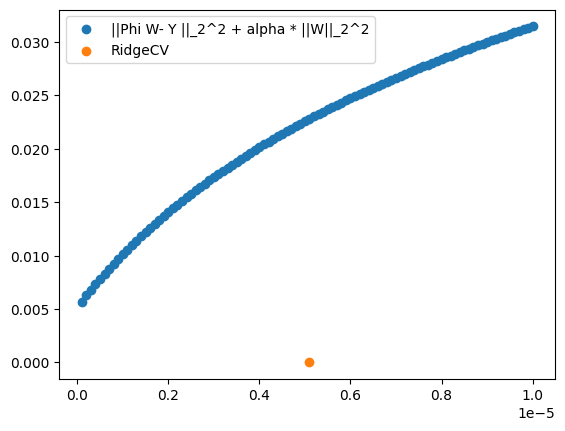

In [489]:
f1 = []
f2 = []
f  = []
for _alpha in alphas:
    
    model = ridge_models[dataset_train][_alpha]
    W = model.coef_
    f1.append(np.linalg.norm(W, 2)**2)
    
    temp = np.dot(Phi[dataset_train][degree], W) - Y[dataset_train]
    f2.append(np.linalg.norm(temp,2)**2)
    
    
    f.append(np.linalg.norm(temp,2)**2 + _alpha * np.linalg.norm(W, 2)**2)

#plt.plot(alphas, f1)
#plt.plot(alphas, f2)
plt.scatter(alphas, f , label = '||Phi W- Y ||_2^2 + alpha * ||W||_2^2')
plt.scatter(alphas[50], ridge_models[dataset_train]['RidgeCV'].alpha_, label = 'RidgeCV')
plt.legend(loc = 'best')
plt.show()
    

### <font color = "#F3A505" > compare condition numbers for $\Phi^T\Phi$ and $\Phi^T\Phi + \alpha I$ and $||\alpha I||_F^2$ of.


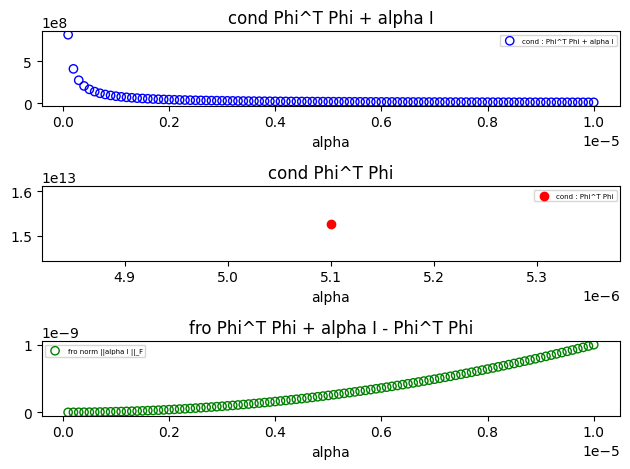

In [490]:
phiT = np.transpose(Phi[dataset_train][degree])
phi  = Phi[dataset_train][degree]

cond1 = np.linalg.cond(np.dot(phiT,phi))

cond2 = []
fro_norm = []



for _alpha in alphas:
    iden = _alpha * np.identity(phi.shape[1])
    
    cond2.append(np.linalg.cond(np.dot(phiT,phi) + iden))
    temp = np.dot(phiT,phi) + iden - np.dot(phiT,phi)
    fro_norm.append(np.linalg.norm(temp, 'fro')**2)

    
fig , ax = plt.subplots(3,1)
    
ax[0].scatter(alphas, cond2,facecolors='none', edgecolors='blue' , label = 'cond : Phi^T Phi + alpha I')
ax[0].set_xlabel('alpha')
ax[0].set_title('cond Phi^T Phi + alpha I')

ax[1].scatter(alphas[50],cond1,color = 'red', label = 'cond : Phi^T Phi')
ax[1].set_xlabel('alpha')
ax[1].set_title('cond Phi^T Phi')

ax[2].scatter(alphas, fro_norm, marker = 'o', facecolors='none', edgecolors='green', label = 'fro norm ||alpha I ||_F')
ax[2].set_xlabel('alpha')
ax[2].set_title('fro Phi^T Phi + alpha I - Phi^T Phi')

ax[0].legend(loc = 'best', prop = {'size' : 5})
ax[1].legend(loc = 'best', prop = {'size' : 5})
ax[2].legend(loc = 'best', prop = {'size' : 5})


fig.tight_layout()
plt.show()


### <font color = "#F3A505" > visualize the result


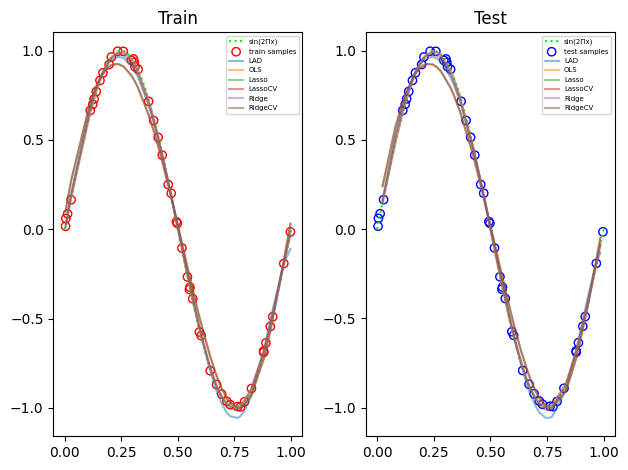

In [491]:
x = np.arange(0,1+0.01,0.01)
y = np.sin(2*np.pi*x)

x_test = datasets[dataset_test_index]['x']
y_test = datasets[dataset_test_index]['t']

x_train = datasets[dataset_train_index]['x']
y_train = datasets[dataset_train_index]['t']



# LAD model 

model_lad = LAD_models[dataset_train]
yhat_lad_tr  = model_lad.predict(Phi[dataset_train][degree])
yhat_lad_te  = model_lad.predict(Phi[dataset_test][degree])

# OLS model

model_ols = OLS_models[dataset_train]
yhat_ols_tr  = model_ols.predict(Phi[dataset_train][degree])
yhat_ols_te  = model_ols.predict(Phi[dataset_test][degree])

# best Lasso model according to train

model_best_lasso = lasso_models[dataset_train][alphas[alpha_index_lasso]]
yhat_lasso_tr  = model_best_lasso.predict(Phi[dataset_train][degree])
yhat_lasso_te  = model_best_lasso.predict(Phi[dataset_test][degree])

# LassoCV model

model_lassoCV = lasso_models[dataset_train]['LassoCV']
yhat_lassocv_tr  = model_lassoCV.predict(Phi[dataset_train][degree])
yhat_lassocv_te  = model_lassoCV.predict(Phi[dataset_test][degree])

# best Ridge model according to train

model_best_ridge = ridge_models[dataset_train][alphas[alpha_index_ridge]]
yhat_ridge_tr  = model_best_ridge.predict(Phi[dataset_train][degree])
yhat_ridge_te  = model_best_ridge.predict(Phi[dataset_test][degree])

# RidgeCV model

model_ridgeCV = ridge_models[dataset_train]['RidgeCV']
yhat_ridgecv_tr  = model_ridgeCV.predict(Phi[dataset_train][degree])
yhat_ridgecv_te  = model_ridgeCV.predict(Phi[dataset_test][degree])


fig , ax = plt.subplots(1,2)


ax[0].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Œ†x)')
ax[0].scatter(x_train, y_train, facecolors='none', edgecolors='red', label = 'train samples')
ax[0].plot(x_train, yhat_lad_tr, label = 'LAD', alpha = 0.5)
ax[0].plot(x_train, yhat_ols_tr, label = 'OLS', alpha = 0.5)
ax[0].plot(x_train, yhat_lasso_tr, label = 'Lasso', alpha = 0.5)
ax[0].plot(x_train, yhat_lassocv_tr, label = 'LassoCV', alpha = 0.5)
ax[0].plot(x_train, yhat_ridge_tr, label = 'Ridge', alpha = 0.5)
ax[0].plot(x_train, yhat_ridgecv_tr, label = 'RidgeCV', alpha = 0.5)

ax[0].set_title('Train')
ax[0].legend(loc = 'best', prop = {'size' : 5})


ax[1].plot(x,y, color = 'lime', linestyle = ':', label = 'sin(2Œ†x)')
ax[1].scatter(x_train, y_train, facecolors='none', edgecolors='blue', label = 'test samples')
ax[1].plot(x_test, yhat_lad_te, label = 'LAD', alpha = 0.5)
ax[1].plot(x_test, yhat_ols_te, label = 'OLS', alpha = 0.5)
ax[1].plot(x_test, yhat_lasso_te, label = 'Lasso', alpha = 0.5)
ax[1].plot(x_test, yhat_lassocv_te, label = 'LassoCV', alpha = 0.5)
ax[1].plot(x_test, yhat_ridge_te, label = 'Ridge', alpha = 0.5)
ax[1].plot(x_test, yhat_ridgecv_te, label = 'RidgeCV', alpha = 0.5)

ax[1].set_title('Test')
ax[1].legend(loc = 'best', prop = {'size' : 5})


fig.tight_layout()
plt.show()
